# YouTube video summarizer

* Receive video link from user
    * Check if link is from YouTube
    * Retrieve video id from link
* Get video transcript from api
    * Check if a video exists in the link
* Send summary to model.
    * Prompt model to summarize the transcript
* Receive summary, show it on screen

In [ ]:
# !pip install google-generativeai streamlit youtube-transcript-api python-dotenv beautifulsoup4 requests

## Check if url is from YouTube

In [9]:
import re

def is_valid_youtube_url(url):
    # Regex pattern to check for a valid YouTube URL
    youtube_regex = re.compile(
        r'(https?://)?(www\.)?(youtube|youtu|youtube-nocookie)\.(com|be)/(watch\?v=|embed/|v/|.+\?v=)?([^&=%\?]{11})')
    
    match = youtube_regex.match(url)
    return match is not None

In [10]:
url = "https://www.youtube.com/watch?v=rfx2l6hnIwc&t=1s"
is_valid_youtube_url(url)

True

In [11]:
url = "https://pypi.org/project/youtube-transcript-api/"
is_valid_youtube_url(url)

False

In [14]:
url = "https://www.youtube.com/watch?v=Rc6Lq5MKLfI"
is_valid_youtube_url(url)

True

## Retrieve video id

In [16]:
import re

def extract_video_id(url):
    # Regex to match video ID
    video_id_match = re.search(r"(?:v=|\/v\/|\/embed\/|youtu\.be\/|\/shorts\/|\/watch\?v=|\/videos\/|\/e\/)([^#\&\?]{11})", url)
    
    if video_id_match:
        return video_id_match.group(1)
    else:
        return None

In [48]:
url = "https://www.youtube.com/watch?v=Rc6Lq5MKLfI"
video_id = extract_video_id(url)
video_id

'Rc6Lq5MKLfI'

In [99]:
url = "https://www.youtube.com/watch?v=pE8TH8hZ-48"
video_id = extract_video_id(url)
video_id

'pE8TH8hZ-48'

## Get Video title and thumbnail

In [82]:
import requests
from bs4 import BeautifulSoup
import os

def get_youtube_info(video_url):
    # Fetch the YouTube page
    response = requests.get(video_url)
    
    # Check if the request was successful
    if response.status_code != 200:
        print(f"Failed to retrieve the video page: {response.status_code}")
        return None

    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the <meta> tag with name "title"
    meta_title_tag = soup.find('meta', attrs={'name': 'title'})
    title = meta_title_tag["content"] if meta_title_tag else None

    # Extract the video ID from the URL
    video_id = video_url.split('v=')[-1].split('&')[0]  # Simple extraction of video ID

    # Construct thumbnail URL
    thumbnail_url = f"https://img.youtube.com/vi/{video_id}/maxresdefault.jpg"

    return title, thumbnail_url

def download_thumbnail(thumbnail_url, title):
    # Create a valid filename by replacing invalid characters
    filename = f"{title}.jpg".replace('/', '_').replace('\\', '_')
    response = requests.get(thumbnail_url)

    # Save the image if the request was successful
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded thumbnail: {filename}")
    else:
        print(f"Failed to download thumbnail: {response.status_code}")

# Example usage
video_url = 'https://www.youtube.com/watch?v=rfx2l6hnIwc&t=1s'  # Replace with your YouTube video URL
title, thumbnail = get_youtube_info(video_url)
print(f"Video Title: {title}")
print(f"Thumbnail URL: {thumbnail}")

Video Title: Anduril's Subramanian: Protecting Space Is Critical
Thumbnail URL: https://img.youtube.com/vi/rfx2l6hnIwc/maxresdefault.jpg


In [50]:
response = requests.get(thumbnail)

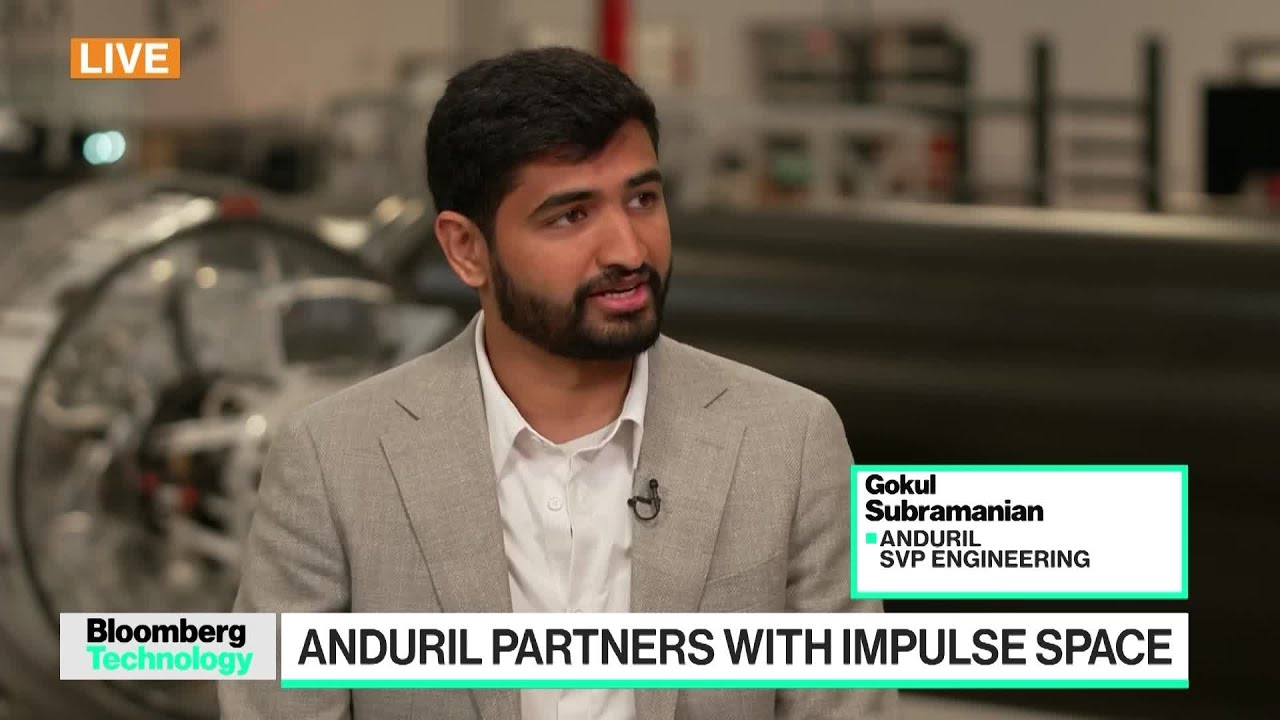

In [53]:
from IPython.display import Image, display

display(Image(response.content))

## Get video transcript

In [133]:
import youtube_transcript_api
from youtube_transcript_api import YouTubeTranscriptApi

def get_transcript(video_id: str):
    try:
        language_list = ["en", "en-US", "en-GB", "en-IN", "en-AU", "en-CA", "en-NZ", "en-ZA", "en-PH", 
                         "en-SG", "en-JM", "en-NG", "en-HK", "en-TT", "en-BZ", "en-MY", "en-IE"]
        transcript = YouTubeTranscriptApi.get_transcript(video_id=video_id, languages=language_list)
        return transcript
    except:
        return None

In [134]:
transcript = get_transcript("Rc6Lq5MKLfI")
transcript

[{'text': "Let's start with the basics for the\naudience that might just be tuning in",
  'start': 0.06,
  'duration': 3.0},
 {'text': 'for the first time wondering where we\nare.',
  'start': 3.06,
  'duration': 1.89},
 {'text': 'Rocket Lab is an end to end space\nprovider, space launch services systems',
  'start': 5.31,
  'duration': 5.91},
 {'text': 'provider.\nBring us up to speed on what that means.',
  'start': 11.22,
  'duration': 3.51},
 {'text': 'Yeah, you know, we think that the space\ncompanies of the future are ones that',
  'start': 15.48,
  'duration': 3.15},
 {'text': "aren't just a launch company or just a\nsatellite company or just an operator of",
  'start': 18.63,
  'duration': 2.97},
 {'text': "satellites.\nIt's really all about providing an end",
  'start': 21.6,
  'duration': 1.71},
 {'text': "to end service.\nSo what you're seeing here in Long Beach",
  'start': 23.31,
  'duration': 2.85},
 {'text': 'is really our headquarters.\nWe make a lot of the rocket compo

In [136]:
str(transcript)

'[{\'text\': "Let\'s start with the basics for the\\naudience that might just be tuning in", \'start\': 0.06, \'duration\': 3.0}, {\'text\': \'for the first time wondering where we\\nare.\', \'start\': 3.06, \'duration\': 1.89}, {\'text\': \'Rocket Lab is an end to end space\\nprovider, space launch services systems\', \'start\': 5.31, \'duration\': 5.91}, {\'text\': \'provider.\\nBring us up to speed on what that means.\', \'start\': 11.22, \'duration\': 3.51}, {\'text\': \'Yeah, you know, we think that the space\\ncompanies of the future are ones that\', \'start\': 15.48, \'duration\': 3.15}, {\'text\': "aren\'t just a launch company or just a\\nsatellite company or just an operator of", \'start\': 18.63, \'duration\': 2.97}, {\'text\': "satellites.\\nIt\'s really all about providing an end", \'start\': 21.6, \'duration\': 1.71}, {\'text\': "to end service.\\nSo what you\'re seeing here in Long Beach", \'start\': 23.31, \'duration\': 2.85}, {\'text\': \'is really our headquarters.\\n

In [131]:
# Private video
print(get_transcript("FB8XF-gEu-w"))

None


In [137]:
print(get_transcript("pE8TH8hZ-48"))

[{'text': '-Welcome to "The Tonight Show."', 'start': 1.001, 'duration': 1.034}, {'text': 'Thank you so much\nfor being here.', 'start': 2.035, 'duration': 1.001}, {'text': '-Delighted to be here. Thanks.', 'start': 3.036, 'duration': 1.635}, {'text': '-For anyone not\nfamiliar with your background,', 'start': 4.671, 'duration': 2.369}, {'text': 'can you explain what type\nof work', 'start': 7.04, 'duration': 1.969}, {'text': 'does a neuroscientist\nactually typically do?', 'start': 9.009, 'duration': 2.269}, {'text': '-Sure. So, a neuroscientist\nis somebody', 'start': 11.278, 'duration': 2.202}, {'text': 'that wants to understand\nthe nervous system,', 'start': 13.48, 'duration': 2.169}, {'text': 'which is the\nbrain and spinal cord.', 'start': 15.649, 'duration': 2.102}, {'text': 'And the brain and spinal\ncord has a bunch of cells,', 'start': 17.751, 'duration': 1.535}, {'text': 'a bunch of little things there', 'start': 19.286, 'duration': 1.735}, {'text': 'that connect to\nall th

## Summarize the transcript

In [34]:
import os
from dotenv import load_dotenv

import google.generativeai as genai

# Loading environment variables
load_dotenv()

# Setting API key
api_key = os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=api_key)

# Initializing model
model = genai.GenerativeModel(model_name="gemini-1.5-flash",
                             system_instruction=
                             """
                             You are a YouTube video transcript summarizer.
                             
                             The inputs you get, will either be the transcript or user queries about your summarization.
                             
                             The YouTube video transcripts will be in the following format:
                             [{'text': "",
                              'start': ,
                              'duration':},
                              .
                              .
                              .
                              ]
                              
                              Your job is to go through the transcript and form a summary of the video.
                              The length of the summary should be directly proportional to video length.
                              The sentiment and style of summary should reflect the topic of the video.
                            
                              User queries about your summary will follow. Answer them with the summary and previous conversations
                              in context.
                             """)

chat = model.start_chat()

def get_response(input):
    # Fetching response
    response = chat.send_message(input, stream=True)
    # Stream response
    for chunk in response:
        yield chunk.text    

In [43]:
def print_response(query):
    for response in get_response(str(query)):
        print(response, end="", flush=True)

In [44]:
print_response(transcript)

Rocket Lab is an end-to-end space provider, meaning they handle everything from building spacecraft to launching them into orbit. They're not just a launch company, but a complete space solutions provider.  They are headquartered in Long Beach, California, and have expanded to locations across the US and New Zealand.

Rocket Lab's Electron rocket is a top performer, having launched 53 times and holding a significant lead in the small, dedicated launch market.  They are also developing a larger rocket, Neutron, to serve the medium-class launch market. 

The company is seeing significant growth in revenue, exceeding $100 million per quarter, thanks to both their launch services (30% of revenue) and their space systems business (70% of revenue). Their space systems business includes building and selling spacecraft components like solar panels, radios, and batteries, as well as complete spacecraft.  They even have a spacecraft on its way to Mars!

Rocket Lab is confident in the future of t

In [45]:
print_response("Is it comparable to SpaceX?")

While both Rocket Lab and SpaceX operate in the space industry, they're not directly comparable. Think of them as two different types of companies:

* **SpaceX:**  A large-scale, ambitious company aiming for major projects like interplanetary travel, reusable rockets, and global internet coverage.  Their focus is on reaching higher orbits and beyond, with powerful rockets that can carry both people and large payloads.
* **Rocket Lab:** A smaller, more focused company that specializes in launching smaller satellites into lower Earth orbit. They are known for their end-to-end space services, including spacecraft design, construction, and operation.

It's like comparing a large cargo ship to a nimble sailboat. Both are seafaring, but they navigate different waters and fulfill different roles.  Rocket Lab targets a niche market with smaller, more frequent launches, while SpaceX pursues grander goals in space exploration and technology. 


## Video handling class

In [59]:
import os
import re
import requests
from bs4 import BeautifulSoup
from youtube_transcript_api import YouTubeTranscriptApi

# Handles URL validity check, video id extraction and transcription
class VideoHandler:

    def __init__(self, url):
        self.url = url # Video URL
        self.video_id = None # Video ID
        self.title = None # YouTube video title
        self.thumbnail = None # YouTube thumbnail
        self.transcript = None # Video transcript

    # Function to check if URL is a valid YouTube address
    def is_valid_youtube_url(self):
        # Regex pattern to check for a valid YouTube URL
        youtube_regex = re.compile(
            r'(https?://)?(www\.)?(youtube|youtu|youtube-nocookie)\.(com|be)/(watch\?v=|embed/|v/|.+\?v=)?([^&=%\?]{11})')
        
        match = youtube_regex.match(self.url)
        return match is not None

    # Function to extract video id from URL
    def extract_video_id(self):
        # Regex to match video ID
        video_id_match = re.search(r"(?:v=|\/v\/|\/embed\/|youtu\.be\/|\/shorts\/|\/watch\?v=|\/videos\/|\/e\/)([^#\&\?]{11})", self.url)
        
        if video_id_match:
            self.video_id = video_id_match.group(1)
        else:
            self.video_id = None

    # Function to extract video title and thumbnail, if available
    def get_title_thumbnail(self):
        # Fetch the YouTube page
        response = requests.get(self.url)
        
        # Check if the request was successful
        if response.status_code != 200:
            self.title = None
            self.thumbnail = None
            return

        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract the video title
        # Find the <meta> tag with name "title"
        meta_title_tag = soup.find('meta', attrs={'name': 'title'})
        self.title = meta_title_tag["content"] if meta_title_tag else None

        # Construct thumbnail URL
        thumbnail_url = f"https://img.youtube.com/vi/{self.video_id}/maxresdefault.jpg"

        response = requests.get(thumbnail_url)

        # Save the image if the request was successful
        self.thumbnail = response.content if (response.status_code == 200) else None

    # Function to retrieve transcript
    def get_transcript(self):
        try:
            transcript = YouTubeTranscriptApi.get_transcript(video_id=self.video_id)
            self.transcript = str(transcript)
        except:
            self.transcript = None

In [60]:
video = VideoHandler("https://www.youtube.com/watch?v=rfx2l6hnIwc&t=1s")

In [61]:
video.extract_video_id()
video.get_title_thumbnail()

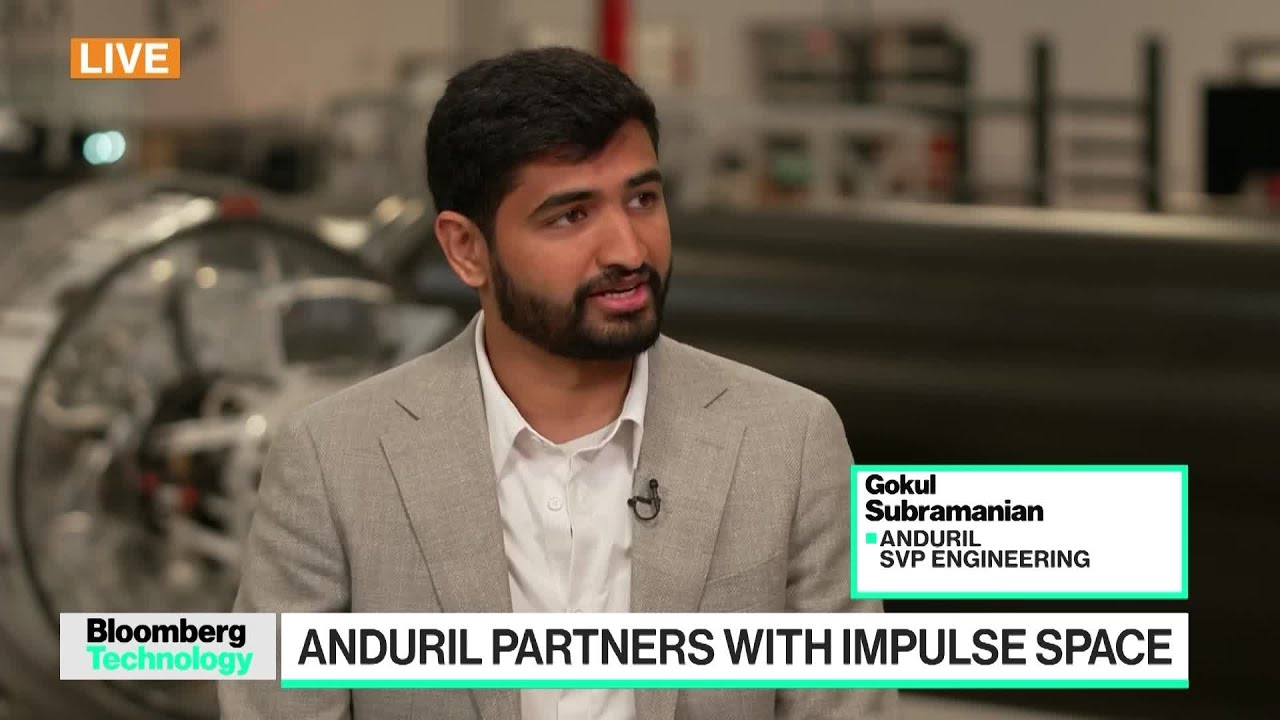

In [62]:
display(Image(video.thumbnail))

In [63]:
video.title

'Title'

In [76]:
# Fetch the YouTube page
response = requests.get("https://www.youtube.com/watch?v=rfx2l6hnIwc&t=1s")
        
# Check if the request was successful
if response.status_code != 200:
    title = None
    thumbnail = None

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Extract the video title
title_tag = soup.find('h1', class_='title style-scope ytd-video-primary-info-renderer')
title = title_tag.text.strip() if title_tag else "Title"

In [65]:
title

'Title'

In [77]:
title_tag

In [67]:
soup

<!DOCTYPE html>
<html darker-dark-theme="" darker-dark-theme-deprecate="" lang="en-GB" refresh="" style="font-size: 10px;font-family: Roboto, Arial, sans-serif;" system-icons="" typography="" typography-spacing=""><head><script data-id="_gd" nonce="Hq2u-abBjSuek2XYDqUUvw">window.WIZ_global_data = {"MUE6Ne":"youtube_web","MuJWjd":false,"UUFaWc":"%.@.null,1000,2]","cfb2h":"youtube.web-front-end-critical_20241009.10_p0","fPDxwd":[],"iCzhFc":false,"nQyAE":{},"oxN3nb":{"1":false,"0":false,"610401301":false,"899588437":false,"188588736":true,"676937399":false,"651175828":false,"653718497":false,"660014094":false},"u4g7r":"%.@.null,1000,2]","xnI9P":true,"xwAfE":true,"yFnxrf":2486};</script><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="ApvK67ociHgr2egd6c2ZjrfPuRs8BHcvSggogIOPQNH7GJ3cVlyJ1NOq/COCdj0+zxskqHt9HgLLETc8qqD+vwsAAABteyJvcmlnaW4iOiJodHRwczovL3lvdXR1YmUuY29tOjQ0MyIsImZlYXR1cmUiOiJQcml2YWN5U2FuZGJveEFkc0FQSXMiLCJleHBpcnkiOjE2OTUxNjc5OTksImlzU3ViZG9tYWluIjp0cnVlfQ=

In [ ]:
<meta content="Anduril's Subramanian: Protecting Space Is Critical" name="title"/>

In [70]:
# Fetch the YouTube page
response = requests.get("https://www.youtube.com/watch?v=rfx2l6hnIwc&t=1s")
        
# Check if the request was successful
if response.status_code != 200:
    title = None
    thumbnail = None

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the <meta> tag with name "title"
meta_title_tag = soup.find('meta', attrs={'name': 'title'})
title = meta_title_tag["content"] if meta_title_tag else None

In [81]:
meta_title_tag["content"]

"Anduril's Subramanian: Protecting Space Is Critical"

In [86]:
response = requests.get(thumbnail)
response.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x05\x03\x04\n\n\n\x08\n\n\x08\n\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\n\x10\r\x08\x08\x0e\t\x08\x08\r\x15\r\x0e\x11\x11\x13\x13\x13\x08\r\x16\x18\x16\x12\x18\x10\x12\x13\x12\x01\x05\x05\x05\x08\x07\x08\r\x08\x08\r\x12\r\r\r\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\xff\xc0\x00\x11\x08\x02\xd0\x05\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x00\x07\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\xff\xc4\x00g\x10\x00\x01\x03\x02\x03\x04\x05\x05\x08\x0b\x0b\x08\x08\x04\x04\x07\x01\x00\x02\x03\x04\x11\x05\x12!\x061AQ\x07\x13aq\x91\x08\x14"2\x81\x15BRS\x92\xa1\xb1\xc1\x16#TUbr\x93\xd1\xd2\xd3\xf0\t\x1834st\x82\x94\xb2\xe1\xf1$5

In [96]:
def get_response():
    response = ["\n", "Query/URL", "not", "supported"]
    
    for word in response:
        yield word + " "

In [97]:
for word in get_response():
    print(word, end="")


 Query/URL not supported 

In [143]:
s = f"s{%}{%}"
s(1,2)

SyntaxError: f-string: invalid syntax (2620951764.py, line 1)

### Streamlit app has been built inside app.py